In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

In [5]:
X_valid.shape

(5000, 28, 28)

In [6]:
y_valid.shape

(5000,)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train.shape

(55000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
y_train.shape

(55000,)

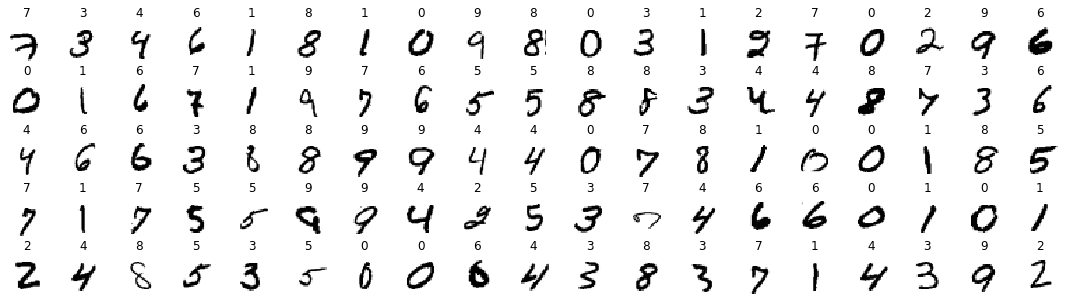

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

n_rows = 5
n_cols = 19

plt.figure(figsize=(n_cols, n_rows))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace = 0.2, hspace=0.5)
plt.show()

In [24]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [25]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [30]:
from sklearn.metrics import accuracy_score
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

expon_lr = ExponentialLearningRate(factor=1.005)


In [31]:
history = model.fit(X_train, y_train, epochs=1,
                   validation_data=(X_valid, y_valid),
                   callbacks=[expon_lr])


1719/1719 [==============================] - 7s 4ms/step - loss: 375278079888628767871779945316352.0000 - accuracy: 0.6032 - val_loss: 2.3911 - val_accuracy: 0.1126


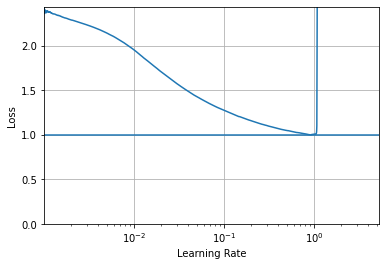

In [33]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.grid()
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.show()

In [34]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [36]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="relu")
])

model.compile(loss="sparse_categorical_crossentropy",
             optimizer = keras.optimizers.SGD(learning_rate=3e-1),
             metrics=["accuracy"])

In [37]:
import os
run_index = 1
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [40]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                   validation_data=(X_valid, y_valid),
                   callbacks=[early_stopping_cb, tensorboard_cb])


2021-09-09 17:11:11.737498: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-09-09 17:11:11.737615: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-09-09 17:11:11.738455: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/100
  65/1719 [>.............................] - ETA: 5s - loss: 14.4288 - accuracy: 0.1048

2021-09-09 17:11:12.101793: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-09-09 17:11:12.101818: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-09-09 17:11:12.123676: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-09-09 17:11:12.124565: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-09-09 17:11:12.125436: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./my_mnist_logs/run_001/train/plugins/profile/2021_09_09_17_11_12

2021-09-09 17:11:12.126146: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./my_mnist_logs/run_001/train/plugins/profile/2021_09_09_17_11_12/Aryans-MacBook-Air.local.trace.json.gz
2021-09-09 17:11:12.127332: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./my_mnist_logs/run_001/tra

1719/1719 [==============================] - 6s 3ms/step - loss: 14.4434 - accuracy: 0.1039 - val_loss: 14.3451 - val_accuracy: 0.1100
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 14.4434 - accuracy: 0.1039 - val_loss: 14.3451 - val_accuracy: 0.1100
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 14.4434 - accuracy: 0.1039 - val_loss: 14.3451 - val_accuracy: 0.1100
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 14.4434 - accuracy: 0.1039 - val_loss: 14.3451 - val_accuracy: 0.1100
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 14.4434 - accuracy: 0.1039 - val_loss: 14.3451 - val_accuracy: 0.1100
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 14.4434 - accuracy: 0.1039 - val_loss: 14.3451 - val_accuracy: 0.1100
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 14.4434 - accuracy: 0.1039 - val_loss: 14.3451 - val_

In [41]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 14.4611 - accuracy: 0.1028


[14.461130142211914, 0.10279999673366547]